# Visualize individual Stock Data:

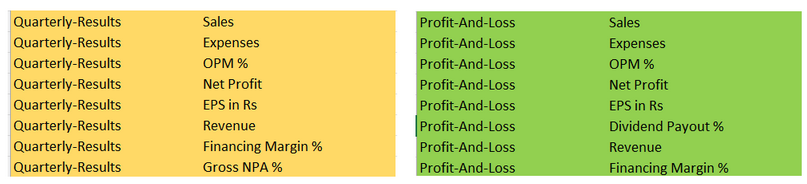

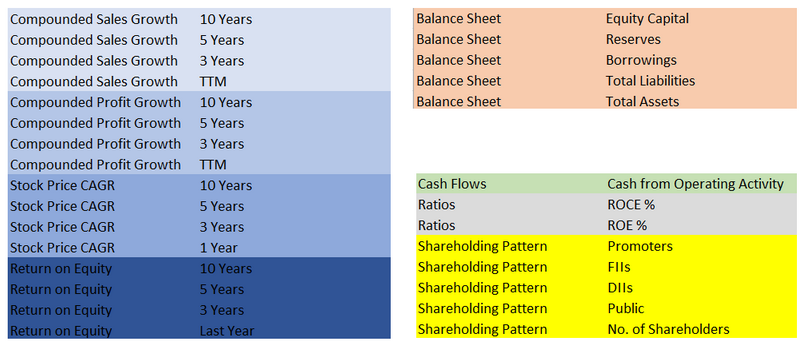

## 1.1 Imports:

In [2]:
import requests as rq
import pandas as pd 
import time
import datetime
import os

import plotly.offline as pyo 
import plotly.graph_objects as go

## 1.2 Functions :  

In [3]:
def sort_columns_chrono(temp_df):
    date = '1970-01-01'
    temp_df = temp_df.sort_index(axis=1, key=lambda x: pd.to_datetime(x, errors='coerce', format='mixed').fillna(date))
    return temp_df.copy()

def transpose_reset_index(temp_df,colname_before,colname_after):
    temp_df = temp_df.rename(columns={colname_before: colname_after})
    temp_df = temp_df.set_index(colname_after).T
    return temp_df.copy()


## 1.3 Read CSV as Input:

>  ⚠️ <span style="color:red"> **Update the CSV File below to read as needed:**</span>

In [33]:
## CAREFULLY UPDATE THIS. 
##  ../Output/RawReports/yyyymmdd-hhMMss/STOCKNAME.csv

stock_name = 'VBL'
input_stock_file = "../Output/RawReports/" + "20240817-132127/"+stock_name+".xlsx"


In [34]:
xls = pd.ExcelFile(input_stock_file)

df_top_ratios               = pd.read_excel(xls, 'Top Ratios') # Top Ratios
df_quaterly_results         = pd.read_excel(xls, 'Quarterly Results') # Quarterly Results
df_profit_n_loss            = pd.read_excel(xls, 'Profit & Loss') # Profit & Loss
df_compounded_sales_growth  = pd.read_excel(xls, 'Compounded Sales Growth') # Compounded Sales Growth
df_compounded_profit_growth = pd.read_excel(xls, 'Compounded Profit Growth') # Compounded Profit Growth
df_stock_price_cagr         = pd.read_excel(xls, 'Stock Price CAGR') # Stock Price CAGR
df_return_on_equity         = pd.read_excel(xls, 'Return on Equity') # Return on Equity
df_balance_sheet            = pd.read_excel(xls, 'Balance Sheet') # Balance Sheet
df_cash_flows               = pd.read_excel(xls, 'Cash Flows') # Cash Flows
df_ratios                   = pd.read_excel(xls, 'Ratios') # Ratios
df_shareholding_pattern     = pd.read_excel(xls, 'Shareholding Pattern') # Shareholding Pattern


# 2.0 Visualizing Quaterly Results:

## 2.1 Function call transform dataframe: 

In [35]:
df_quaterly_results = sort_columns_chrono(df_quaterly_results)
df_quaterly_results = transpose_reset_index(df_quaterly_results,'Quarterly Results','Quarter')

df_quaterly_results.head(2)

Quarter,Sales,Expenses,Operating Profit,OPM %,Other Income,Interest,Depreciation,Profit before tax,Tax %,Net Profit,EPS in Rs,Raw PDF
Jun 2021,2450,1879,571,23%,24,47,129,420,24%,319,2.37,NaN
Sep 2021,2398,1904,495,21%,37,43,138,350,26%,258,1.85,NaN


## 2.2 Quaterly Result - Sales:

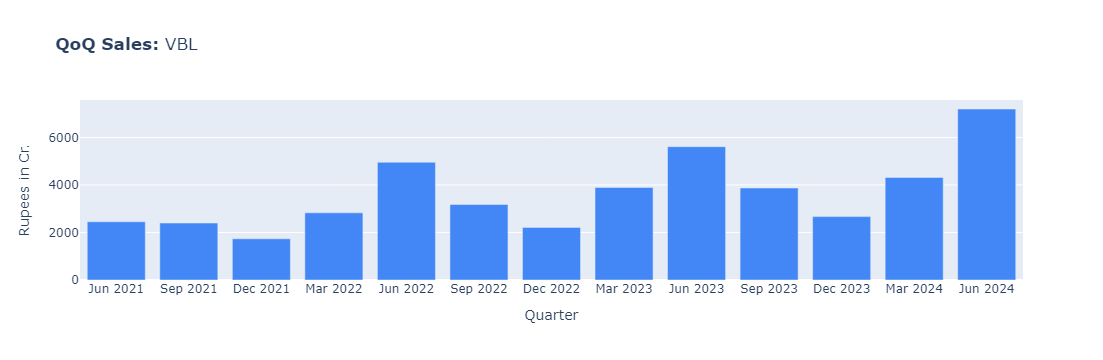

In [36]:
## Charting
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure()

x = df_quaterly_results.index
y = df_quaterly_results['Sales'].astype(int) # Sales Column

trace_name = 'QoQ Sales'

fig.add_trace(go.Bar(x=x, y=y, name=trace_name, marker_color ="#4287f5"))

plot_title = '<b>QoQ Sales: </b>' + stock_name

fig.update_layout(
        title=plot_title,
        xaxis_title='Quarter',
        yaxis_title='Rupees in Cr.')

#fig.update_traces(marker_color='green')

# pyo.plot(fig, filename="temp-plot.html")
fig.show()

## 2.3 Quaterly Result - Expenses:

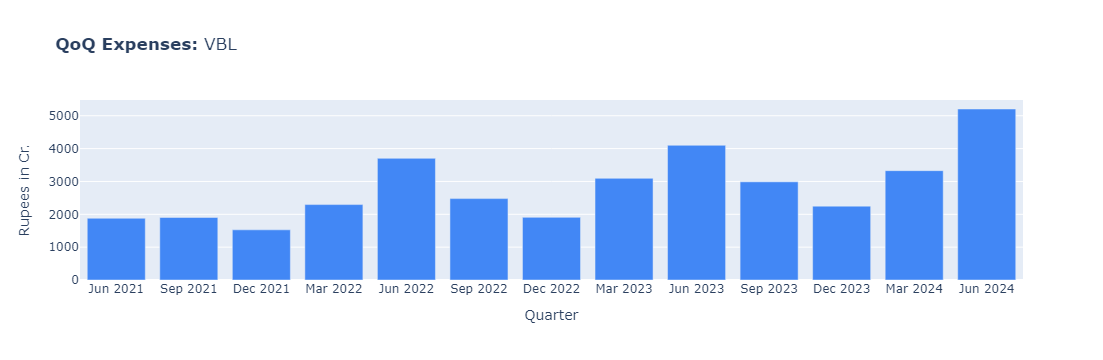

In [37]:
## Charting
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure()

x = df_quaterly_results.index
y = df_quaterly_results['Expenses'].astype(int) # Expenses Column

trace_name = 'QoQ Expenses'

fig.add_trace(go.Bar(x=x, y=y, name=trace_name, marker_color ="#4287f5"))

plot_title = '<b>QoQ Expenses: </b>' + stock_name

fig.update_layout(
        title=plot_title,
        xaxis_title='Quarter',
        yaxis_title='Rupees in Cr.')

#fig.update_traces(marker_color='green')

# pyo.plot(fig, filename="temp-plot.html")
fig.show()

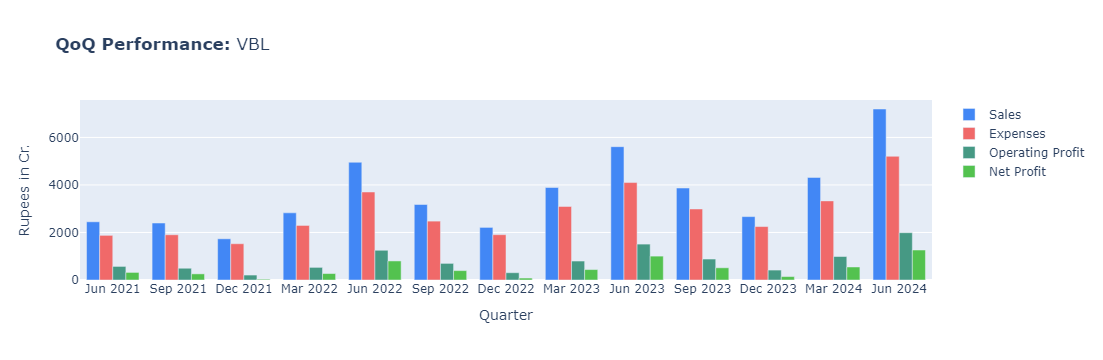

In [38]:
## Charting
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure()

x = df_quaterly_results.index
y1 = df_quaterly_results['Sales'].astype(int) # Sales Column
y2 = df_quaterly_results['Expenses'].astype(int) # Expenses Column
y3 = df_quaterly_results['Operating Profit'].astype(int) # Expenses Column
y4 = df_quaterly_results['Net Profit'].astype(int) # Expenses Column

fig.add_trace(go.Bar(x=x, y=y1, name='Sales', marker_color ="#4287f5"))
fig.add_trace(go.Bar(x=x, y=y2, name='Expenses', marker_color ="#f06969"))
fig.add_trace(go.Bar(x=x, y=y3, name='Operating Profit', marker_color ="#469984"))
fig.add_trace(go.Bar(x=x, y=y4, name='Net Profit', marker_color ="#53c24f"))

plot_title = '<b>QoQ Performance: </b>' + stock_name

fig.update_layout(
        title=plot_title,
        xaxis_title='Quarter',
        yaxis_title='Rupees in Cr.')

#fig.update_traces(marker_color='green')

# pyo.plot(fig, filename="temp-plot.html")
fig.show()